In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive 
drive.mount("/content/gdrive",force_remount=True)

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Colab_data/creditcard.csv",)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
import seaborn as sns 
corr = df.corr()
corr.style.background_gradient(cmap="coolwarm", axis=None).set_precision(2)



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.00,0.12,-0.01,-0.42,-0.11,0.17,-0.06,0.08,-0.04,-0.01,0.03,-0.25,0.12,-0.07,-0.10,-0.18,0.01,-0.07,0.09,0.03,-0.05,0.04,0.14,0.05,-0.02,-0.23,-0.04,-0.01,-0.01,-0.01,-0.01
V1,0.12,1.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.23,-0.10
V2,-0.01,0.00,1.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.53,0.09
V3,-0.42,-0.00,0.00,1.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.21,-0.19
V4,-0.11,0.00,-0.00,-0.00,1.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.10,0.13
V5,0.17,0.00,-0.00,-0.00,-0.00,1.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.39,-0.09
V6,-0.06,0.00,0.00,0.00,-0.00,0.00,1.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.22,-0.04
V7,0.08,0.00,0.00,0.00,0.00,-0.00,0.00,1.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.40,-0.19
V8,-0.04,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,1.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.10,0.02
V9,-0.01,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,1.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.04,-0.10


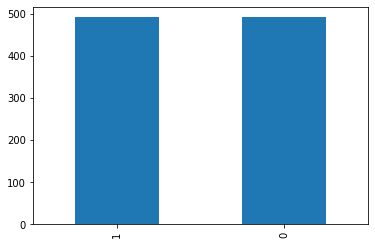

In [ ]:
suspicious_count = len(df[df['Class'] == 1])
non_suspicious_count = len(df[df['Class'] == 0])

sampled_non_suspicious = df[df['Class'] == 0].sample(n=suspicious_count)
suspicious = df[df['Class'] == 1]

sampled_non_suspicious.reset_index(drop=True, inplace=True)
suspicious.reset_index(drop=True, inplace=True)

balanced_data = pd.concat([sampled_non_suspicious, suspicious]).reset_index(drop=True);

balanced_data['Class'].value_counts().plot(kind='bar')

In [ ]:
y=balanced_data["Class"]
X=balanced_data.drop(columns=["Class"])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(590, 30)
(394, 30)
(590,)
(394,)


In [ ]:
y_train.head()
y_test.head()

613    1
451    0
731    1
436    0
275    0
Name: Class, dtype: int64

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
X_test = tf.convert_to_tensor(X_test)
X_train = tf.convert_to_tensor(X_train)
y_test = tf.convert_to_tensor(y_test)
y_train = tf.convert_to_tensor(y_train)

In [ ]:
print(X_test)


tf.Tensor(
[[ 4.12330000e+04 -1.06457996e+01  5.91830666e+00 ...  2.73328727e-01
  -1.52908081e-01  0.00000000e+00]
 [ 1.70800000e+04 -5.92232776e+00  4.68961086e+00 ...  1.36551934e+00
   2.07768932e-01  6.90000000e-01]
 [ 7.23270000e+04 -4.19873461e+00  1.94120637e-01 ...  1.24941367e+00
  -1.31524644e-01  2.38900000e+02]
 ...
 [ 1.34420000e+05  1.92906818e+00 -3.47781694e-01 ...  3.07795760e-02
  -3.94424963e-02  9.99000000e+00]
 [ 6.11080000e+04 -2.75600712e+00  6.83821377e-01 ... -1.16631533e+00
   8.21214803e-01  1.01500000e+02]
 [ 1.51029000e+05 -3.81821372e+00  2.55133768e+00 ... -3.48107406e-01
   8.77768724e-02  1.07000000e+01]], shape=(394, 30), dtype=float64)


Epoch 1/10
19/19 [==============================] - 1s 12ms/step - loss: 0.7079 - accuracy: 0.4898 - val_loss: 0.6992 - val_accuracy: 0.5152
Epoch 2/10
19/19 [==============================] - 0s 3ms/step - loss: 0.7053 - accuracy: 0.4898 - val_loss: 0.6973 - val_accuracy: 0.5152
Epoch 3/10
19/19 [==============================] - 0s 3ms/step - loss: 0.7027 - accuracy: 0.4898 - val_loss: 0.6958 - val_accuracy: 0.5152
Epoch 4/10
19/19 [==============================] - 0s 3ms/step - loss: 0.7005 - accuracy: 0.4898 - val_loss: 0.6946 - val_accuracy: 0.5152
Epoch 5/10
19/19 [==============================] - 0s 3ms/step - loss: 0.6987 - accuracy: 0.4898 - val_loss: 0.6938 - val_accuracy: 0.5152
Epoch 6/10
19/19 [==============================] - 0s 4ms/step - loss: 0.6973 - accuracy: 0.4898 - val_loss: 0.6934 - val_accuracy: 0.5152
Epoch 7/10
19/19 [==============================] - 0s 4ms/step - loss: 0.6963 - accuracy: 0.4898 - val_loss: 0.6930 - val_accuracy: 0.5152
Epoch 8/10
19/19 [=

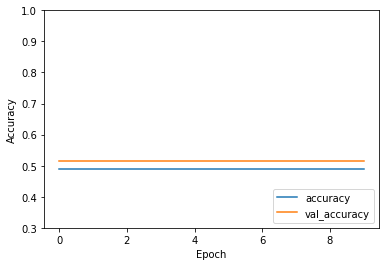

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(8,activation="sigmoid"))
model.add(keras.layers.Dense(4,activation="sigmoid"))
model.add(keras.layers.Dense(2,activation="sigmoid"))
model.add(keras.layers.Dense(1))

model.compile(optimizer="Nadam", loss=keras.losses.BinaryCrossentropy(from_logits=True),metrics=["accuracy"])

history=model.fit(X_train,y_train,epochs=10, batch_size=32, validation_data=(X_test,y_test))

plt.plot(history.history["accuracy"],label="accuracy")
plt.plot(history.history["val_accuracy"],label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim([0.3,1])
plt.legend(loc="lower right")

test_loss, test_acc=model.evaluate(X_test,y_test,verbose=2)
print(test_acc)


Epoch 1/100
295/295 [==============================] - 3s 7ms/step - loss: 0.8477 - accuracy: 0.4932 - val_loss: 0.6931 - val_accuracy: 0.5152
Epoch 2/100
295/295 [==============================] - 2s 6ms/step - loss: 0.6934 - accuracy: 0.4898 - val_loss: 0.6932 - val_accuracy: 0.5152
Epoch 3/100
295/295 [==============================] - 2s 6ms/step - loss: 0.6932 - accuracy: 0.4898 - val_loss: 0.6934 - val_accuracy: 0.5152
Epoch 4/100
295/295 [==============================] - 2s 6ms/step - loss: 0.6932 - accuracy: 0.4898 - val_loss: 0.6935 - val_accuracy: 0.5152
Epoch 5/100
295/295 [==============================] - 2s 6ms/step - loss: 0.6931 - accuracy: 0.4898 - val_loss: 0.6935 - val_accuracy: 0.5152
Epoch 6/100
295/295 [==============================] - 2s 6ms/step - loss: 0.6931 - accuracy: 0.4898 - val_loss: 0.6936 - val_accuracy: 0.5152
Epoch 7/100
295/295 [==============================] - 2s 6ms/step - loss: 0.6932 - accuracy: 0.4898 - val_loss: 0.6936 - val_accuracy: 0.5152

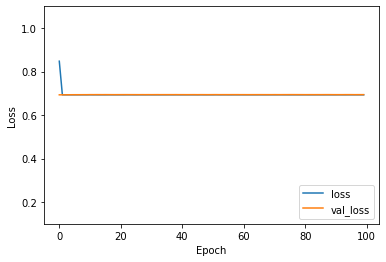

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(512,activation="relu"))
model.add(keras.layers.Dense(512,activation="relu"))
model.add(keras.layers.Dense(256,activation="relu"))
model.add(keras.layers.Dense(256,activation="relu"))
model.add(keras.layers.Dense(128,activation="relu"))
model.add(keras.layers.Dense(128,activation="relu"))
model.add(keras.layers.Dense(32,activation="relu"))
model.add(keras.layers.Dense(32,activation="relu"))
model.add(keras.layers.Dense(16,activation="relu"))
model.add(keras.layers.Dense(16,activation="relu"))
model.add(keras.layers.Dense(2,activation="relu"))
model.add(keras.layers.Dense(2,activation="relu"))
model.add(keras.layers.Dense(1))

model.compile(optimizer="Adam", loss=keras.losses.BinaryCrossentropy(from_logits=True),metrics=["accuracy"])

history=model.fit(X_train,y_train,epochs=100, batch_size=2, validation_data=(X_test,y_test))

plt.plot(history.history["loss"],label="loss")
plt.plot(history.history["val_loss"],label="val_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.ylim([0.1,1.1])
plt.legend(loc="lower right")

test_loss, test_acc=model.evaluate(X_test,y_test,verbose=2)
print(test_acc)

In [ ]:
model.save("/content/gdrive/MyDrive/Colab Notebooks/Colab_data/model_ann")

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Colab Notebooks/Colab_data/model_ann/assets


In [ ]:
print(df)
df.drop(columns=[[]])

            Time         V1         V2  ...  Class  Original  Predicted
0            0.0  -1.359807  -0.072781  ...      0         0  -6.177642
1            0.0   1.191857   0.266151  ...      0         0  -6.176627
2            1.0  -1.358354  -1.340163  ...      0         0  -6.179816
3            1.0  -0.966272  -0.185226  ...      0         0  -6.177590
4            2.0  -1.158233   0.877737  ...      0         0  -6.176960
...          ...        ...        ...  ...    ...       ...        ...
284802  172786.0 -11.881118  10.071785  ...      0         0  -9.434046
284803  172787.0  -0.732789  -0.055080  ...      0         0  -9.434492
284804  172788.0   1.919565  -0.301254  ...      0         0  -9.435467
284805  172788.0  -0.240440   0.530483  ...      0         0  -9.434200
284806  172792.0  -0.533413  -0.189733  ...      0         0  -9.440276

[284807 rows x 33 columns]


KeyError: ignored

In [ ]:
from keras.models import load_model
model=load_model("/content/gdrive/MyDrive/Colab Notebooks/Colab_data/model_ann")




In [ ]:
pr = df.drop(columns=['Class'])
pr = tf.convert_to_tensor(pr)
classes=model.predict(pr)
df["Original"]=df['Class']
df["Predicted"]=classes


In [ ]:
df_pred=df[["Original","Predicted"]]

In [ ]:
df_pred.head(30)


,Original,Predicted
0,0,-6.177642
1,0,-6.176627
2,0,-6.179816
3,0,-6.177590
4,0,-6.176960
5,0,-6.176627
6,0,-6.176627
7,0,-6.176627
8,0,-6.176627
9,0,-6.176627


In [ ]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
979    1
980    1
981    1
982    1
983    1
Name: Class, Length: 984, dtype: int64
